In [54]:
import numpy as np
np.random.seed(7)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import mnist
from keras import regularizers

In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)

(60000, 28, 28)


In [57]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 #normalize 0-1
X_test /= 255
print(X_train.shape)

(60000, 784)


In [58]:
print (y_train.shape)

(60000,)


In [59]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [60]:
print (Y_train.shape)

(60000, 10)


In [61]:
model = Sequential()
model.add(Dense(784, activation = 'relu',input_shape=(784,),kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax'))

In [62]:
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

In [63]:
info = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=32, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 45s 749us/step - loss: 0.8847 - acc: 0.8924 - val_loss: 0.6311 - val_acc: 0.9130
Epoch 2/50
60000/60000 [==============================] - 44s 730us/step - loss: 0.6045 - acc: 0.9165 - val_loss: 0.5845 - val_acc: 0.9180
Epoch 3/50
60000/60000 [==============================] - 45s 743us/step - loss: 0.5604 - acc: 0.9239 - val_loss: 0.5286 - val_acc: 0.9314
Epoch 4/50
60000/60000 [==============================] - 45s 753us/step - loss: 0.5327 - acc: 0.9275 - val_loss: 0.5101 - val_acc: 0.9312
Epoch 5/50
60000/60000 [==============================] - 45s 754us/step - loss: 0.5134 - acc: 0.9310 - val_loss: 0.4878 - val_acc: 0.9349
Epoch 6/50
60000/60000 [==============================] - 47s 788us/step - loss: 0.4980 - acc: 0.9342 - val_loss: 0.4804 - val_acc: 0.9404
Epoch 7/50
60000/60000 [==============================] - 50s 836us/step - loss: 0.4850 - acc: 0.9360 - val_loss: 0.

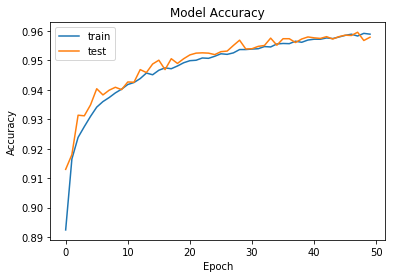

In [65]:
#print(info.history.keys())
import matplotlib.pyplot as plt
plt.plot(info.history['acc'])
plt.plot(info.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

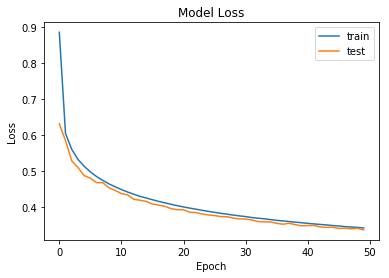

In [66]:
plt.plot(info.history['loss'])
plt.plot(info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [67]:
score = model.evaluate(X_test, Y_test, verbose=1)
print ("Test Accuracy: ",score[1]*100)

10000/10000 [==============================] - 2s 177us/step
Test Accuracy:  95.78999999999999


In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 666,330
Trainable params: 666,330
Non-trainable params: 0
_________________________________________________________________
